<a href="https://colab.research.google.com/github/kanjamwingirwa/Hypothesis-Testing/blob/main/Farnadis_Kanja_IP4_DS12_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
#We begin by importing Libraries
#Import pandas
import pandas as pd

In [89]:
#Import Numpy
import numpy as np

In [90]:
#Import Seaborn
import seaborn as sns

In [91]:
#Import Matplotlib
import matplotlib.pyplot as plt


In [92]:
#Read the data
electricCars_df = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

In [93]:
#Preview the data
electricCars_df.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


# **Data Cleaning**

In [94]:
#check data types
electricCars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [95]:
#We first have to changge the date type
electricCars_df['date'] = pd.to_datetime(electricCars_df['date'], dayfirst=True)
#pd.to_datetime('7/8/1952, dayfirst=True)
electricCars_df.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-02-01,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-03-01,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-04-01,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-05-01,1440,4,weekday,114,117,3,3,6,6,18,20


In [96]:
#check data types again to see if the change was executed
electricCars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Postal code             16085 non-null  int64         
 1   date                    16085 non-null  datetime64[ns]
 2   n_daily_data_points     16085 non-null  int64         
 3   dayOfWeek               16085 non-null  int64         
 4   day_type                16085 non-null  object        
 5   BlueCars_taken_sum      16085 non-null  int64         
 6   BlueCars_returned_sum   16085 non-null  int64         
 7   Utilib_taken_sum        16085 non-null  int64         
 8   Utilib_returned_sum     16085 non-null  int64         
 9   Utilib_14_taken_sum     16085 non-null  int64         
 10  Utilib_14_returned_sum  16085 non-null  int64         
 11  Slots_freed_sum         16085 non-null  int64         
 12  Slots_taken_sum         16085 non-null  int64 

In [97]:
#We then have to change the postal code to string as it doesn't have a numerical bearing
electricCars_df['Postal code']=electricCars_df['Postal code'].astype(str)
electricCars_df.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-02-01,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-03-01,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-04-01,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-05-01,1440,4,weekday,114,117,3,3,6,6,18,20


In [98]:
#check data types again to see if the change was executed
electricCars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Postal code             16085 non-null  object        
 1   date                    16085 non-null  datetime64[ns]
 2   n_daily_data_points     16085 non-null  int64         
 3   dayOfWeek               16085 non-null  int64         
 4   day_type                16085 non-null  object        
 5   BlueCars_taken_sum      16085 non-null  int64         
 6   BlueCars_returned_sum   16085 non-null  int64         
 7   Utilib_taken_sum        16085 non-null  int64         
 8   Utilib_returned_sum     16085 non-null  int64         
 9   Utilib_14_taken_sum     16085 non-null  int64         
 10  Utilib_14_returned_sum  16085 non-null  int64         
 11  Slots_freed_sum         16085 non-null  int64         
 12  Slots_taken_sum         16085 non-null  int64 

In [99]:
#Change the values in the column day of week to actual days for the data to make more sense
electricCars_df['dayOfWeek'].replace({0: 'Monday',1: 'Tuesday',
        2: 'Wednesday',
        3: 'Thursday',
        4: 'Friday',
        5: 'Saturday',
        6:'Sunnday'}, inplace=True)
  
# print Data frame after replacing the values
electricCars_df.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,Monday,weekday,110,103,3,2,10,9,22,20
1,75001,2018-02-01,1438,Tuesday,weekday,98,94,1,1,8,8,23,22
2,75001,2018-03-01,1439,Wednesday,weekday,138,139,0,0,2,2,27,27
3,75001,2018-04-01,1320,Thursday,weekday,104,104,2,2,9,8,25,21
4,75001,2018-05-01,1440,Friday,weekday,114,117,3,3,6,6,18,20


In [100]:
#remove all the nun-numerical values
electricCars_df = electricCars_df[electricCars_df.isnull().sum(axis=1) < 1]
electricCars_df.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,Monday,weekday,110,103,3,2,10,9,22,20
1,75001,2018-02-01,1438,Tuesday,weekday,98,94,1,1,8,8,23,22
2,75001,2018-03-01,1439,Wednesday,weekday,138,139,0,0,2,2,27,27
3,75001,2018-04-01,1320,Thursday,weekday,104,104,2,2,9,8,25,21
4,75001,2018-05-01,1440,Friday,weekday,114,117,3,3,6,6,18,20


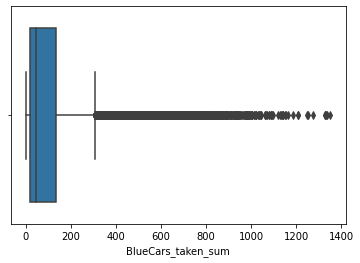

In [101]:
#check for outliers
import seaborn as sns
sns.boxplot(x=electricCars_df['BlueCars_taken_sum'])

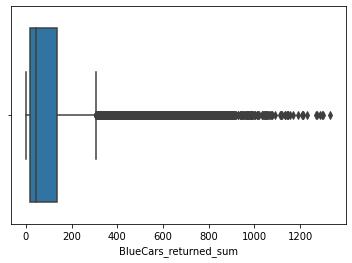

In [102]:
#check for outliers
import seaborn as sns
sns.boxplot(x=electricCars_df['BlueCars_returned_sum'])

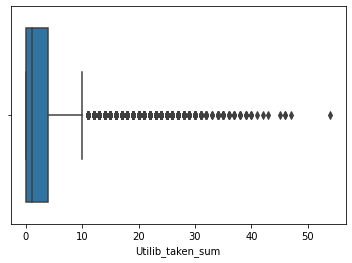

In [103]:
#check for outliers
import seaborn as sns
sns.boxplot(x=electricCars_df['Utilib_taken_sum'])

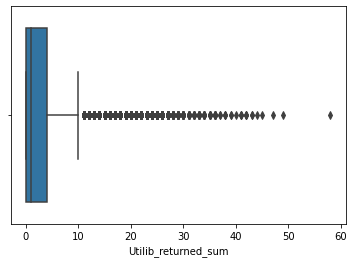

In [104]:
#check for outliers
import seaborn as sns
sns.boxplot(x=electricCars_df['Utilib_returned_sum'])

Since we will only deal with blue cars, we stop checking for outliers as the graph seems to normally distributed. 

# **Univariate Analysis: Blue Cars**

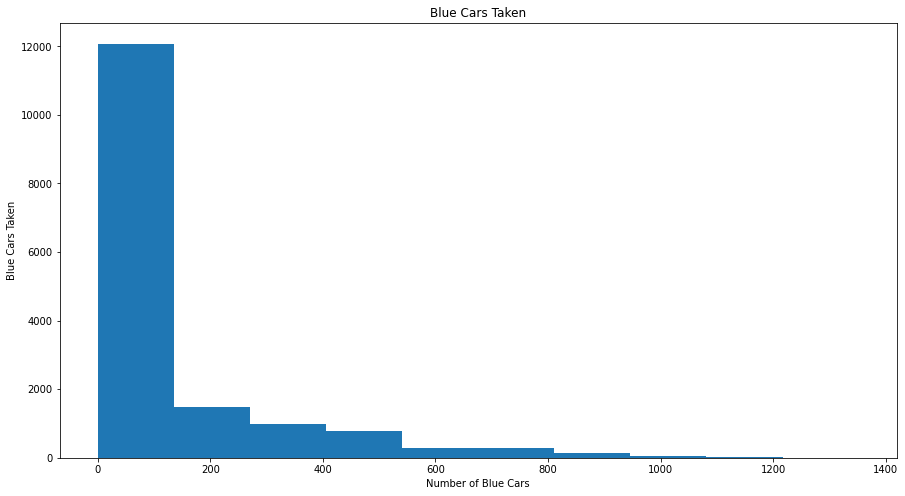

In [123]:
#looking at people with bank Accounts with respect to marital status
plt.hist(electricCars_df['BlueCars_taken_sum'])
plt.gcf().set_size_inches(15, 8)
# Labelling our x axis
plt.xlabel("Number of Blue Cars")

# Labelling our y axis
plt.ylabel("Blue Cars Taken")

# Giving a title to our Bar chart
plt.title("Blue Cars Taken")
plt.show()
#this shows that people who are married have the most bank account

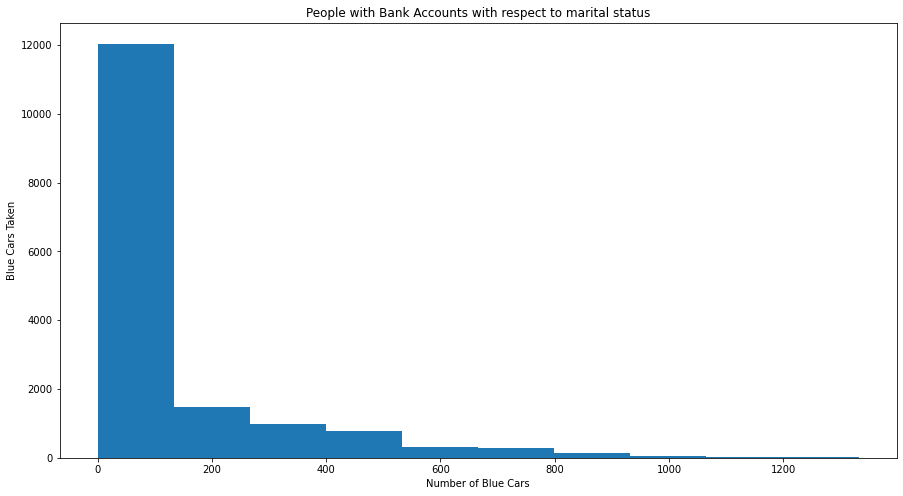

In [106]:
#looking at people with bank Accounts with respect to marital status
plt.hist(electricCars_df['BlueCars_returned_sum'])
plt.gcf().set_size_inches(15, 8)
# Labelling our x axis
plt.xlabel("Number of Blue Cars")

# Labelling our y axis
plt.ylabel("Blue Cars Taken")

# Giving a title to our Bar chart
plt.title("BLue Cars Returned")
plt.show()
#this shows that people who are married have the most bank account


From the two graphs above, there seems to be very little difference between the blue cars taken and the blue cars returned. This seems to suggest that the all the blue cars taken were returned

# **BiVariate Analysis**

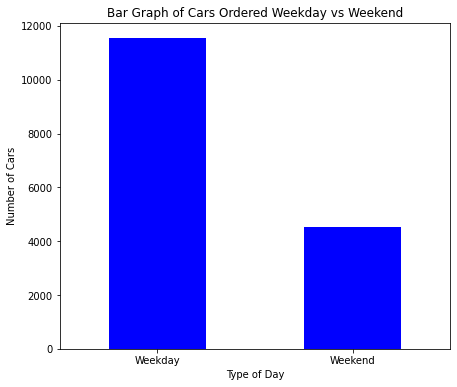

In [122]:

DayType = electricCars_df['day_type'].value_counts()
plt.figure(figsize=(7, 6))
ax = DayType.plot(kind='bar', rot=0, color="b")
ax.set_title("Bar Graph of Cars Ordered Weekday vs Weekend", y = 1)
ax.set_xlabel('Type of Day')
ax.set_ylabel('Number of Cars')
ax.set_xticklabels(('Weekday', 'Weekend'))
plt.show()

In [108]:
df_grouped = electricCars_df.groupby('day_type').sum()[['BlueCars_taken_sum',	'BlueCars_returned_sum']]
df_grouped

,BlueCars_taken_sum,BlueCars_returned_sum
day_type,,
weekday,1339435,1334941
weekend,686100,690365


Text(0.5, 1.0, 'Blue Cars Taken vs Blue Cars Returned as shown whether Weekday or Weekend')

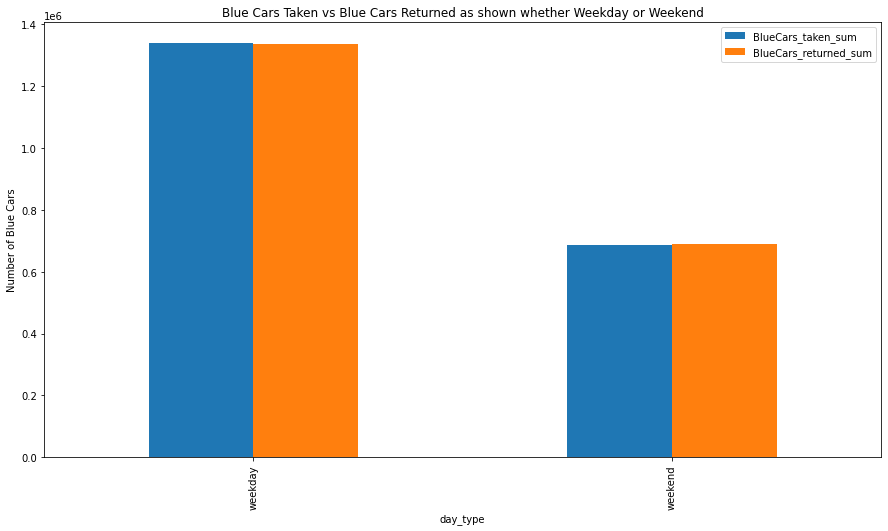

In [121]:
df_grouped.plot(kind="bar",figsize=(15, 8))
# Labelling our y axis
plt.ylabel("Number of Blue Cars")

# Giving a title to our Bar chart
plt.title("Blue Cars Taken vs Blue Cars Returned as shown whether Weekday or Weekend")


This shows that the number of blue cars both returned and taken over the weekend is much lower than during the weekdays

In [110]:
df_grouped2 = electricCars_df.groupby('dayOfWeek').sum()[['BlueCars_taken_sum',	'BlueCars_returned_sum']]
df_grouped2

,BlueCars_taken_sum,BlueCars_returned_sum
dayOfWeek,,
Friday,288546,286029
Monday,263893,264808
Saturday,353934,351570
Sunnday,332166,338795
Thursday,263207,262961
Tuesday,261940,260470
Wednesday,261849,260673


Text(0.5, 1.0, 'Blue Cars Taken vs Blue Cars Returned as shown per Day')

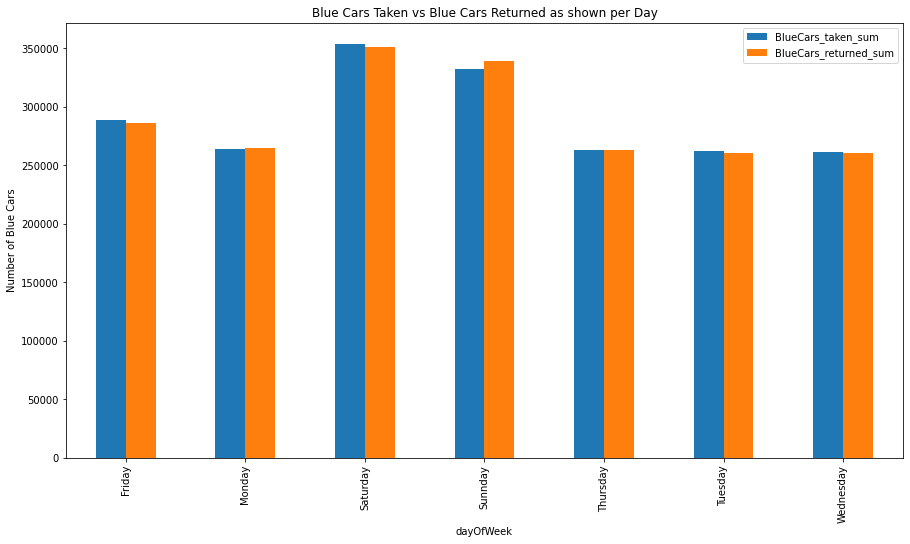

In [120]:
df_grouped2.plot(kind="bar",figsize=(15, 8))

# Labelling our y axis
plt.ylabel("Number of Blue Cars")

# Giving a title to our Bar chart
plt.title("Blue Cars Taken vs Blue Cars Returned as shown per Day")

This graph shows us that on an individual basis, the weekends perform much better than the weekdays

# **Hypothesis Testing**

Based on the information above, I make the hypothesis that blue cars are used at a higher rate on Saturday and Sunday than the weekdays. However, on those two days, the mean rate of taking blue cars remains roughly the same. 

Null Hypothesis: The mean rate of ordering blue cars on Saturday is equal to Sunday

Alternative Hypothesis: The mean rate of ordering blue cars on Saturday is not equal to Sunday

In [112]:
# Selecting the sample of blue cars taken
#no_show = medical_df['No-show'] == 'Yes'
#sample_df=medical_df.loc[no_show].sample(n=50, replace = False)
Sato = electricCars_df['dayOfWeek'] == 'Saturday'
blueCarsTakenSato_sample = electricCars_df.loc[Sato]['BlueCars_taken_sum'].sample(n = 35, replace="False")
print(blueCarsTakenSato_sample)

2394      49
12800     57
8463       1
3174       0
3220      15
8172      14
12949     35
13268      5
12094    135
3057     623
5609      39
13385     40
4809      37
2790     591
13921     21
7415     167
2561     991
9259      15
107      188
13995     12
13423     39
9858      98
2678     551
4251       7
6752      64
14352     53
14796     44
14671    113
9702     141
1171     458
3397      17
14442     45
3517      52
7713      83
10922      0
Name: BlueCars_taken_sum, dtype: int64


In [113]:
Sunday = electricCars_df['dayOfWeek'] == 'Sunnday'
blueCarsTakenSunday_sample = electricCars_df.loc[Sunday]['BlueCars_taken_sum'].sample(n = 35, replace="False")
print(blueCarsTakenSunday_sample)

4224       18
1438      467
360       277
13319      41
10680      51
6546       51
9845      124
1214      393
10092     132
3384       16
9409      158
6671       82
8991      106
4194       36
6881       33
6303       69
10694      64
481       307
9416      143
593       185
16075      34
11058      56
10858      51
2337     1001
15162      47
8599       32
12579      29
222       167
13312      36
6168       86
10725      58
12950      46
11037      57
2597      816
4357        4
Name: BlueCars_taken_sum, dtype: int64


In [114]:
import statistics
SoftData = blueCarsTakenSato_sample 
SoftDataMean = statistics.mean(SoftData)
print(SoftDataMean)

137.14285714285714


In [115]:
import statistics
SoftData2 = blueCarsTakenSunday_sample 
SoftDataMean = statistics.mean(SoftData2)
print(SoftDataMean)

150.65714285714284


In [116]:
#calculate std dev
stdev=(statistics.stdev(SoftData))
print(stdev)

225.78114635730807


In [117]:
#calculate std dev
stdev=(statistics.stdev(SoftData2))
print(stdev)

218.4405886191999


In [118]:
#as the std deviations are not vastly different, we'll assume a std deviation of 221 for both samples
#we use z score since the sample is greater tha 30
zscore = (137.14285714285714- 150.65714285714284)/ 221
zscore

-0.06115061409179052

In [119]:
#We compute p value
import pandas as pd
from scipy import stats
from scipy.stats import norm
import numpy as np
prob = stats.norm.cdf(-0.06115061409179052)
prob

0.47561963016175185

This is 47% which is higher than 2.5% as this is a two tailed test and thus we accept the null hypothesis. 
We conclude that the mean rate of ordering blue cars on Saturday is equal to Sunday. 